In [1]:
!pip install google-play-scraper pandas matplotlib seaborn nltk textblob wordcloud
!pip install snscrape


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 7.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import Sort, reviews


In [7]:
result, continuation_token = reviews(
    'com.application.zomato',
    lang='en',       # language
    country='in',    # country
    sort=Sort.NEWEST,
    count=20000       # number of reviews
)

# Convert to DataFrame
df = pd.DataFrame(result)
df = df[['content', 'score', 'at', 'appVersion']]

# Save raw data
df.to_csv("zomato_reviews_raw.csv", index=False)

df.head(10)


,content,score,at,appVersion
0,such a nice and helpfull app,4,2025-09-21 00:18:15,19.1.4
1,good,5,2025-09-20 23:38:22,19.1.4
2,1. A delivery boy not delivering the order ask...,1,2025-09-20 23:10:15,19.1.4
3,zomato really need to improve its customer sup...,1,2025-09-20 23:02:25,None
4,very good,5,2025-09-20 22:59:55,19.1.4
5,Mind blowing performance system,5,2025-09-20 22:33:42,19.1.4
6,excellent,5,2025-09-20 22:19:59,19.1.4
7,better then Swiggy,5,2025-09-20 22:17:18,19.1.4
8,good 👍,5,2025-09-20 22:14:32,19.1.4
9,great app,5,2025-09-20 22:09:30,19.1.4


In [8]:
complaints = df[df['score'] <= 2].copy()
print("Total complaints:", complaints.shape[0])
complaints.head()


Total complaints: 3033


,content,score,at,appVersion
2,1. A delivery boy not delivering the order ask...,1,2025-09-20 23:10:15,19.1.4
3,zomato really need to improve its customer sup...,1,2025-09-20 23:02:25,None
10,take so long time to deliver food,1,2025-09-20 21:54:46,19.1.4
11,"I ordered biryani and all I got was stale, war...",1,2025-09-20 21:53:02,19.1.4
14,500 rupee ka chiz 50 mei dena chahiye with 50%...,1,2025-09-20 21:38:58,19.1.4


In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)            # remove links
    text = re.sub(r"[^A-Za-z\s]", "", text)        # keep only letters
    text = text.lower()
    return " ".join([w for w in text.split() if w not in stop_words])

complaints['cleaned'] = complaints['content'].astype(str).apply(clean_text)
complaints[['content', 'cleaned']].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,cleaned
2,1. A delivery boy not delivering the order ask...,delivery boy delivering order asking cancel gi...
3,zomato really need to improve its customer sup...,zomato really need improve customer support ai...
10,take so long time to deliver food,take long time deliver food
11,"I ordered biryani and all I got was stale, war...",ordered biryani got stale warm rice
14,500 rupee ka chiz 50 mei dena chahiye with 50%...,rupee ka chiz mei dena chahiye discount full s...
22,waste of time app do not download this app 😡😡,waste time app download app
23,🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬​I was...,charged cancellation fee twice orders never re...
26,worst app,worst app
35,was charged cancellation fee after them being ...,charged cancellation fee late hour way connect...
37,order delivery partner galti se let huva almos...,order delivery partner galti se let huva almos...


In [13]:
complaints.shape

(3033, 5)

In [14]:
complaints.head()

,content,score,at,appVersion,cleaned
2,1. A delivery boy not delivering the order ask...,1,2025-09-20 23:10:15,19.1.4,delivery boy delivering order asking cancel gi...
3,zomato really need to improve its customer sup...,1,2025-09-20 23:02:25,None,zomato really need improve customer support ai...
10,take so long time to deliver food,1,2025-09-20 21:54:46,19.1.4,take long time deliver food
11,"I ordered biryani and all I got was stale, war...",1,2025-09-20 21:53:02,19.1.4,ordered biryani got stale warm rice
14,500 rupee ka chiz 50 mei dena chahiye with 50%...,1,2025-09-20 21:38:58,19.1.4,rupee ka chiz mei dena chahiye discount full s...


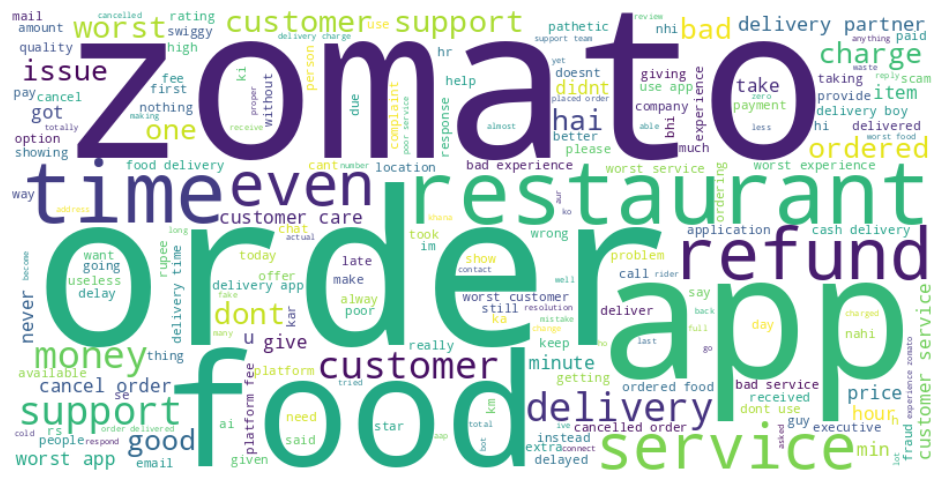

In [10]:
from wordcloud import WordCloud

text = " ".join(complaints['cleaned'])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [11]:
complaints.to_csv("zomato_complaints_cleaned.csv", index=False)


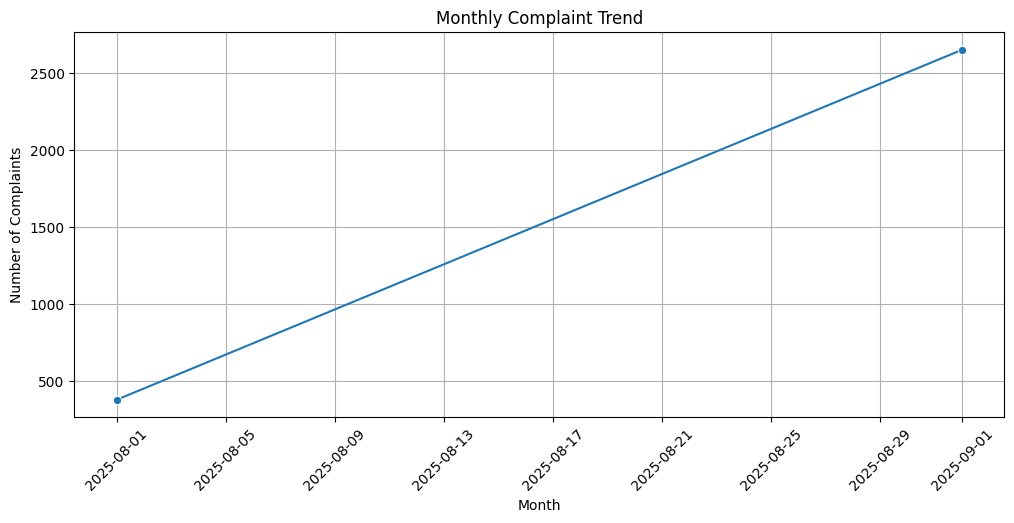

In [15]:
import matplotlib.dates as mdates
complaints['at'] = pd.to_datetime(complaints['at'])
complaints_over_time = complaints.groupby(complaints['at'].dt.to_period('M')).size()
complaints_over_time.index = complaints_over_time.index.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(x=complaints_over_time.index, y=complaints_over_time.values, marker='o')
plt.title("Monthly Complaint Trend")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipython-input-492041671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')


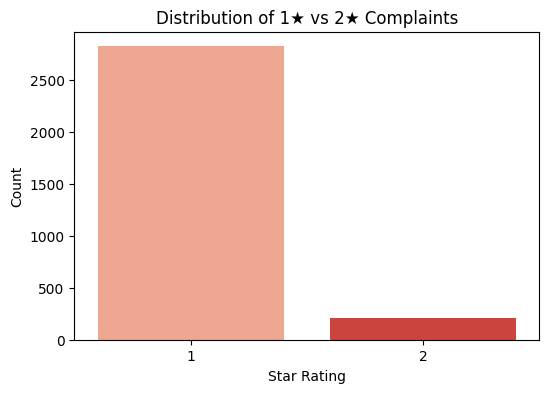

In [16]:
rating_counts = complaints['score'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')
plt.title("Distribution of 1★ vs 2★ Complaints")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1681527820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_counts.values, y=version_counts.index, palette='viridis')


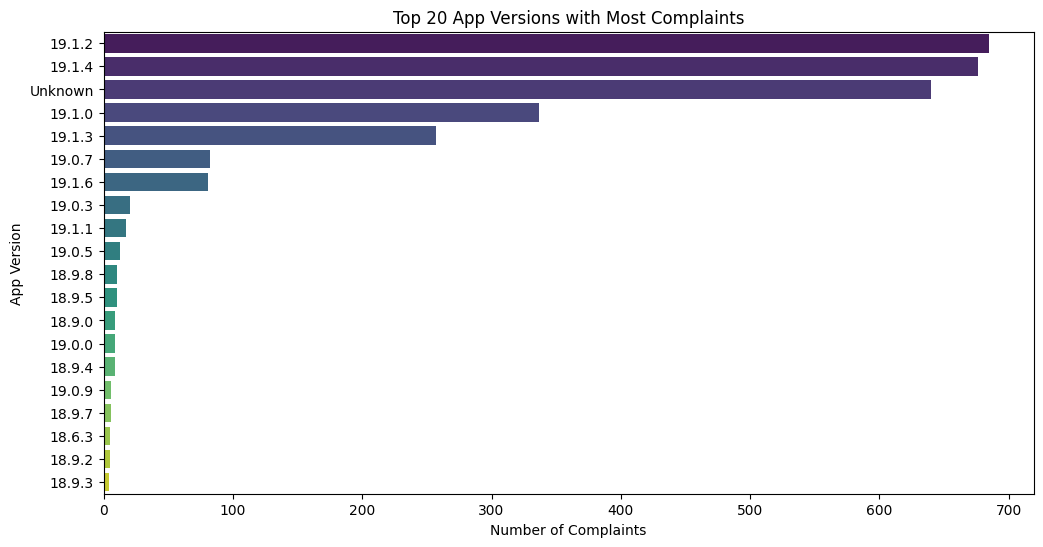

In [17]:
version_counts = complaints['appVersion'].fillna("Unknown").value_counts().head(20)  # top 20

plt.figure(figsize=(12,6))
sns.barplot(x=version_counts.values, y=version_counts.index, palette='viridis')
plt.title("Top 20 App Versions with Most Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("App Version")
plt.show()

In [27]:
# Dividing the dataset into categories to analyse the actual problem
# Useless or non constructive reviews can be filtered out in this
categories = {
    "Late Delivery": ["late", "delay", "waiting", "slow", "delivery time", "long time","der","time"],
    "Payment/Refund Issues": ["payment", "refund", "money", "charge", "wallet", "transaction", "paid but", "deducted"],
    "Wrong/Missing Items": ["wrong item", "missing", "not received", "incorrect", "order missing", "order wrong","got"],
    "High Charges / Pricing": ["expensive", "cost", "high charge", "overpriced", "price"],
    "App / Technical Issues": ["app crash", "bug", "login", "technical", "freeze", "error", "unable to open", "not working"],
    "Customer Support": ["support", "help", "service", "response", "care", "customer service", "contacted"],
}

In [19]:
def categorize_complaint(text):
    text = text.lower()
    matched = []
    for cat, keywords in categories.items():
        if any(k in text for k in keywords):
            matched.append(cat)
    if not matched:
        matched = ["Other"]
    return ", ".join(matched)

In [23]:
complaints['category'] = complaints['cleaned'].apply(categorize_complaint)

In [26]:
complaints[['content', 'cleaned', 'category']].head(10)

,content,cleaned,category
2,1. A delivery boy not delivering the order ask...,delivery boy delivering order asking cancel gi...,"Payment/Refund Issues, Customer Support"
3,zomato really need to improve its customer sup...,zomato really need improve customer support ai...,"Late Delivery, High Charges / Pricing, Custome..."
10,take so long time to deliver food,take long time deliver food,Late Delivery
11,"I ordered biryani and all I got was stale, war...",ordered biryani got stale warm rice,Wrong/Missing Items
14,500 rupee ka chiz 50 mei dena chahiye with 50%...,rupee ka chiz mei dena chahiye discount full s...,Other
22,waste of time app do not download this app 😡😡,waste time app download app,Other
23,🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬​I was...,charged cancellation fee twice orders never re...,"Payment/Refund Issues, Customer Support"
26,worst app,worst app,Other
35,was charged cancellation fee after them being ...,charged cancellation fee late hour way connect...,"Late Delivery, Payment/Refund Issues"
37,order delivery partner galti se let huva almos...,order delivery partner galti se let huva almos...,"Payment/Refund Issues, Customer Support"


/tmp/ipython-input-4005124086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts_filtered.keys()), y=list(category_counts_filtered.values()), palette="magma")


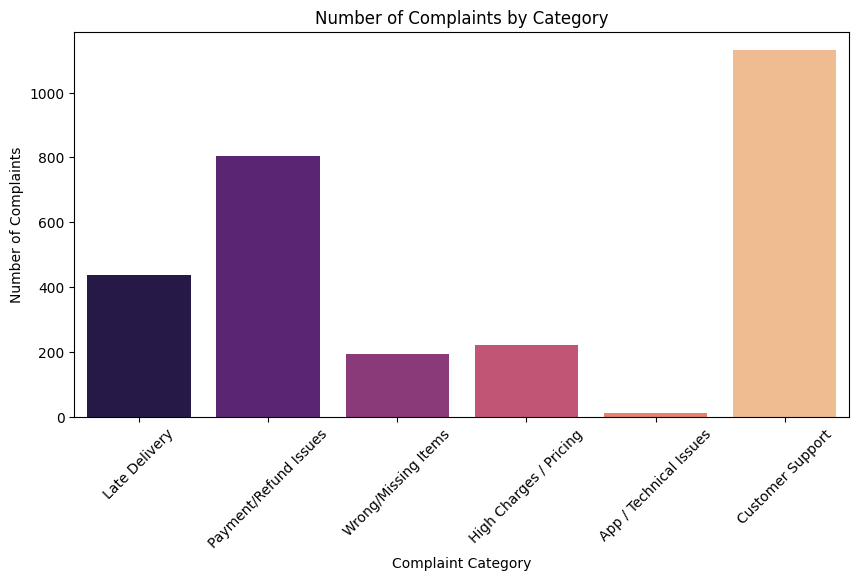

In [29]:
from collections import Counter

all_categories = []
for cats in complaints['category']:
    all_categories.extend([c.strip() for c in cats.split(",")])

category_counts = Counter(all_categories)

# Keep only our main 6 categories
main_categories = list(categories.keys())
category_counts_filtered = {cat: category_counts.get(cat, 0) for cat in main_categories}

# --------------------------
# 2️⃣ Plot Clean Category Count
# --------------------------
plt.figure(figsize=(10,5))
sns.barplot(x=list(category_counts_filtered.keys()), y=list(category_counts_filtered.values()), palette="magma")
plt.title("Number of Complaints by Category")
plt.xlabel("Complaint Category")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

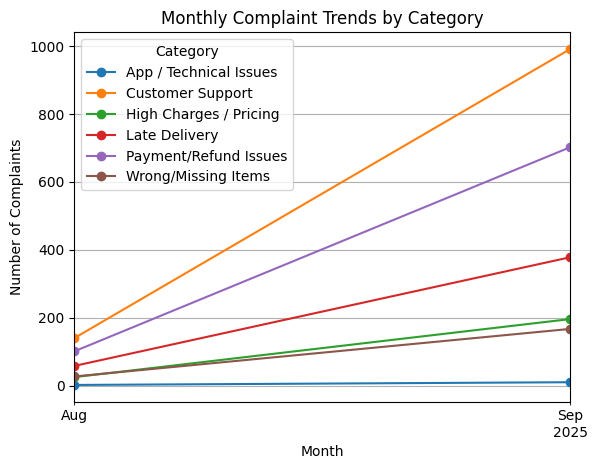

In [30]:
complaints['month'] = complaints['at'].dt.to_period('M')

# Explode categories for proper grouping
complaints_exploded = complaints.assign(category=complaints['category'].str.split(',')).explode('category')
complaints_exploded['category'] = complaints_exploded['category'].str.strip()

# Keep only main categories
complaints_exploded = complaints_exploded[complaints_exploded['category'].isin(main_categories)]

# Group by month & category
monthly_trends = complaints_exploded.groupby(['month','category']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12,6))
monthly_trends.plot(marker='o')
plt.title("Monthly Complaint Trends by Category")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()

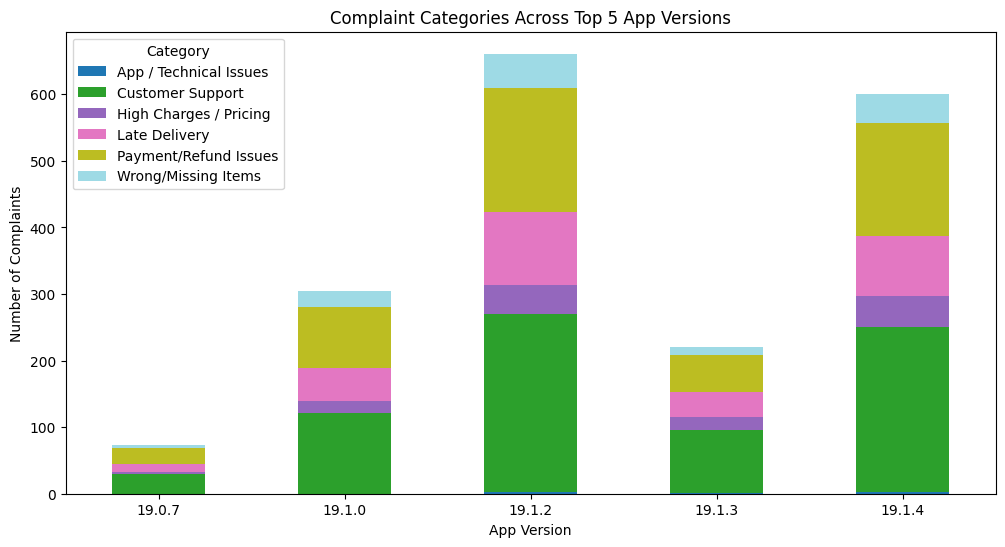

In [31]:
top_versions = complaints['appVersion'].value_counts().head(5).index.tolist()
version_category = complaints_exploded[complaints_exploded['appVersion'].isin(top_versions)]
version_category_grouped = version_category.groupby(['appVersion','category']).size().unstack(fill_value=0)

# Plot stacked bar
version_category_grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Complaint Categories Across Top 5 App Versions")
plt.xlabel("App Version")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

Making Summary Table

In [33]:
total_per_category = complaints_exploded.groupby('category').size()
peak_month_per_category = complaints_exploded.groupby('category')['month'].apply(lambda x: x.value_counts().idxmax())

In [34]:
top_version_per_category = complaints_exploded.groupby('category')['appVersion'].apply(lambda x: x.value_counts().idxmax())

In [46]:
summary_table = pd.DataFrame({
    "Total Complaints": total_per_category,
    "Peak Month": peak_month_per_category.astype(str),
    "Top App Version": top_version_per_category
}).reset_index().rename(columns={"index": "Category"})

summary_table

,category,Total Complaints,Peak Month,Top App Version
0,App / Technical Issues,12,2025-09,19.1.4
1,Customer Support,1131,2025-09,19.1.2
2,High Charges / Pricing,221,2025-09,19.1.4
3,Late Delivery,436,2025-09,19.1.2
4,Payment/Refund Issues,803,2025-09,19.1.2
5,Wrong/Missing Items,194,2025-09,19.1.2


from matplotlib import pyplot as plt
summary_table['Total Complaints'].plot(kind='hist', bins=20, title='Total Complaints')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('Top App Version').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Total Complaints'].plot(kind='line', figsize=(8, 4), title='Total Complaints')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Top App Version'].value_counts()
    for x_label, grp in summary_table.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('Top App Version')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='Total Complaints', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Top App Version'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='Total Complaints', y='Top App Version', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

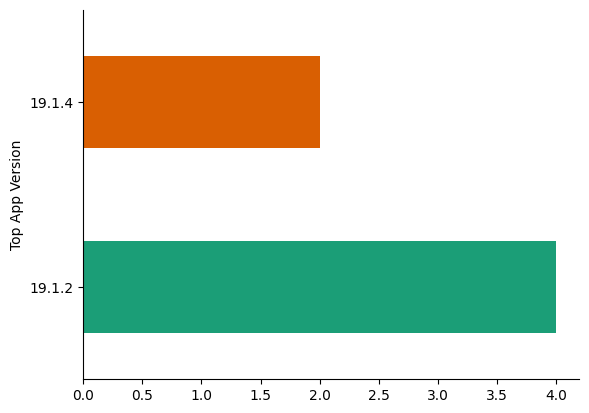

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('Top App Version').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

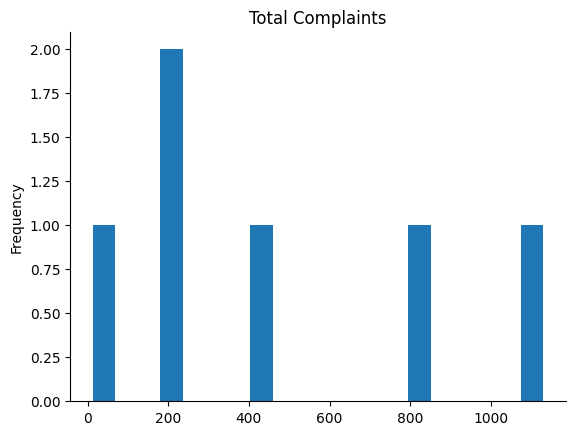

In [49]:
from matplotlib import pyplot as plt
summary_table['Total Complaints'].plot(kind='hist', bins=20, title='Total Complaints')
plt.gca().spines[['top', 'right',]].set_visible(False)

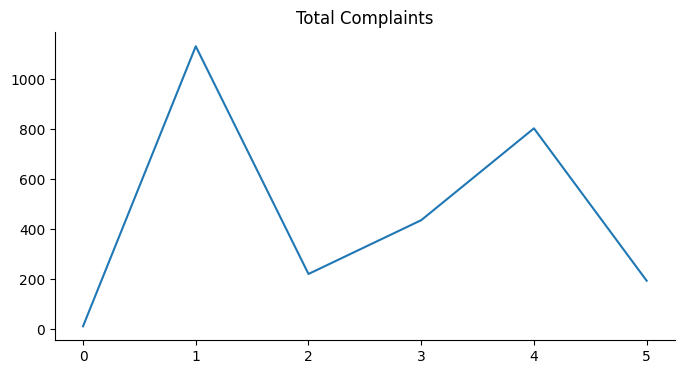

In [48]:
from matplotlib import pyplot as plt
summary_table['Total Complaints'].plot(kind='line', figsize=(8, 4), title='Total Complaints')
plt.gca().spines[['top', 'right']].set_visible(False)

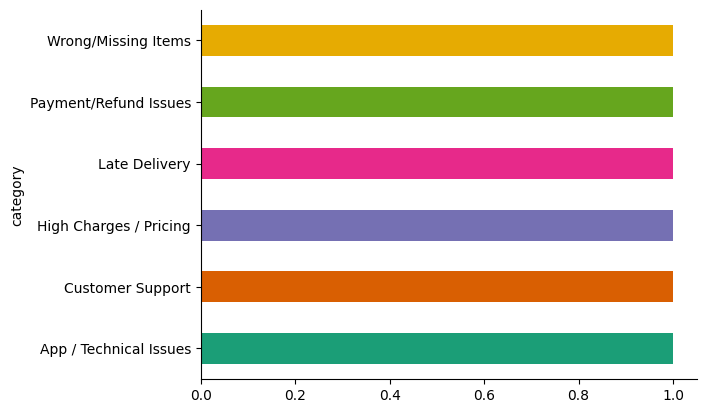

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Actionable Insights

In [40]:
#1 Analyze what's going wrong for which analyze which category is getting complaint the most

In [43]:
top_categories = total_per_category.sort_values(ascending=False).head(3).index.tolist()

insights = []
for cat in top_categories:
    total = total_per_category[cat]
    peak_month = peak_month_per_category[cat]
    top_version = top_version_per_category[cat]

    insight = f"'{cat}' is the top complaint type with {total} complaints, peaking in {peak_month}, mostly on app version {top_version}."
    insights.append(insight)


In [45]:
print("Top 3 Categories of complaints\n")
for i, ins in enumerate(insights, 1):
    print(f"{i}. {ins}\n")

Top 3 Categories of complaints

1. 'Customer Support' is the top complaint type with 1131 complaints, peaking in 2025-09, mostly on app version 19.1.2.

2. 'Payment/Refund Issues' is the top complaint type with 803 complaints, peaking in 2025-09, mostly on app version 19.1.2.

3. 'Late Delivery' is the top complaint type with 436 complaints, peaking in 2025-09, mostly on app version 19.1.2.

